In [1]:
%matplotlib inline
from pjr import *

/Users/d3x345/anaconda/envs/uvcdat-2.12/lib/python2.7/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
fname = "/Users/d3x345/Desktop/NetCDF_files/vd05_ANN_climo.nc"
g2 = cdms2.open(fname);
varlist = g2.listvariables();
dims = g2.listdimension();
#print "dims", dims;
#print "varlist", varlist;

conv = 86400.*1000. # convert m/s to mm/d
PRECC =  g2('PRECC',squeeze=1)*conv            # extract fields, remove dimensions length one
PRECC.getAxisList()
lon = PRECC.getAxis(1)
lat = PRECC.getAxis(0)
print lat
LANDFRAC2 = g2('LANDFRAC',squeeze=1)
print "PRECC range", PRECC.min(), PRECC.max()
lat2 = g2['lat']
print "lat2",lat2
lon2 = g2['lon']
print "PRECC.info()", PRECC.info()


# if V2av and V2a_av differ it suggests that the averager is using a different weighting value
print "PRECCav=", cdutil.averager(PRECC,axis="xy",weights="weighted")
print "LANDFRAC2av=", cdutil.averager(LANDFRAC2,axis="xy",weights="weighted")


   id: lat
   Designated a latitude axis.
   units:  degrees_north
   Length: 192
   First:  -89.7643979058
   Last:   89.7643979058
   Other axis attributes:
      realtopology: linear
      long_name: latitude
      standard_name: latitude
      axis: Y
   Python id:  0x1125ebf10

PRECC range 0.0 22.1516
lat2    id: lat
   Designated a latitude axis.
   units:  degrees_north
   Length: 192
   First:  -89.7643979058
   Last:   89.7643979058
   Other axis attributes:
      realtopology: linear
      long_name: latitude
      standard_name: latitude
      axis: Y
   Python id:  0x181c793b90

PRECC.info()*** Description of Slab variable_57 ***
id: variable_57
shape: (192, 288)
filename: 
missing_value: 1e+20
comments: 
grid_name: <None>
grid_type: generic
time_statistic: 
long_name: Convective precipitation rate (liq + ice)
units: m/s
tileIndex: None
cell_methods: time: mean
Grid has Python id 0x181c443ed0.
Gridtype: generic
Grid shape: (192, 288)
Order: yx
** Dimension 1 **
   id: lat
 

axes [   id: lat
   Designated a latitude axis.
   units:  degrees_north
   Length: 96
   First:  0.471204188482
   Last:   89.7643979058
   Other axis attributes:
      realtopology: linear
      long_name: latitude
      standard_name: latitude
      axis: Y
   Python id:  0x181b98f710
,    id: lon
   Designated a longitude axis.
   units:  degrees_east
   Length: 113
   First:  220.0
   Last:   360.0
   Other axis attributes:
      modulo: 360.0
      realtopology: circular
      long_name: longitude
      standard_name: longitude
      axis: X
      topology: circular
   Python id:  0x110e217d0
]
LF2a_av= 2.12864521353


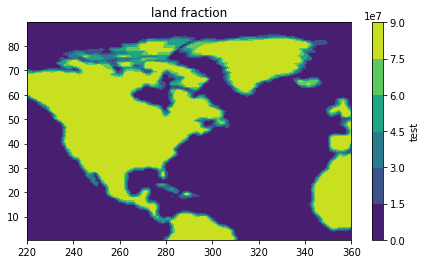

In [4]:
# extract a region
V2N = g2('PRECC',squeeze=1,lat=(0.,90.),lon=(220.,360.))*conv            # extract fields, remove dimensions length one
V2NA = cdutil.averager(V2N,axis="xy",weights="weighted")
LFN = g2('LANDFRAC',squeeze=1,lat=(0.,90.),lon=(220.,360.))*conv 
#print "V2NA.info()", V2N.info(), V2N.shape;
#print "V2NA", V2NA
print "axes", V2N.getAxisList()
V2NS = V2N[:]  # produce a non-transient variable
#print "V2NS info", V2NS.info()
latN = V2NS.getAxis(0)
#print "lat", lat
lonN = V2NS.getAxis(1)
#print "lon", lon
#help(V2NA)
plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
plt.title("land fraction")
cs = plt.contourf(lonN, latN, LFN)
# add colorbar.
cbar = plt.colorbar(cs)
cbar.set_label('test')
print "LF2a_av=", cdutil.averager(V2NS,axis="xy",weights="weighted")
plt.show()

llist True True
longname Convective precipitation rate (liq + ice)
range 9.16604e-05 22.1516
*** Description of Slab variable_115 ***
id: variable_115
shape: (96, 113)
filename: 
missing_value: 1e+20
comments: 
grid_name: <None>
grid_type: generic
time_statistic: 
long_name: Convective precipitation rate (liq + ice)
units: m/s
tileIndex: None
cell_methods: time: mean
Grid has Python id 0x181b98fa90.
Gridtype: generic
Grid shape: (96, 113)
Order: yx
** Dimension 1 **
   id: lat
   Designated a latitude axis.
   units:  degrees_north
   Length: 96
   First:  0.471204188482
   Last:   89.7643979058
   Other axis attributes:
      realtopology: linear
      long_name: latitude
      standard_name: latitude
      axis: Y
   Python id:  0x181b98f710
** Dimension 2 **
   id: lon
   Designated a longitude axis.
   units:  degrees_east
   Length: 113
   First:  220.0
   Last:   360.0
   Other axis attributes:
      modulo: 360.0
      realtopology: circular
      long_name: longitude
      stan

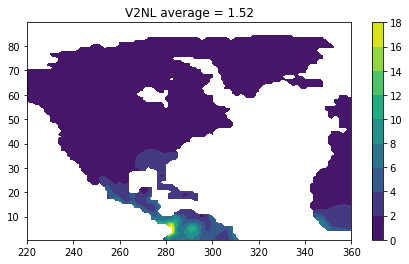

In [5]:
# find a mask for land in NH region
llist = (LFN[:] < 0.5)
print "llist",llist[0,0],llist[-1,-1] # print out a few values which should be near NP and SP
#print "land zero", llist.shape
V2NL = V2N # create a variable that is a copy of the NH precip
V2NL.mask = llist # add a mask for land points
print "longname",V2NL.long_name
plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
print "range", V2NL.min(), V2NL.max()
V2NL.info()
gavg = cdutil.averager(V2NL,axis="xy",weights="weighted")
#titl = "{0:s} (model-obs) = {1:f}".format("V2NL",gavg)
titl = "%s = %.2f"%("V2NL average", gavg)
print titl
plt.title(titl)
clevs =  np.arange(0.,20., 2).tolist()
print clevs
cs = plt.contourf(lonN, latN, V2NL, clevs)
# add colorbar.
cbar = plt.colorbar(cs)
plt.show()
#print "masked DV =", cdutil.averager(DVM,axis="xy",weights="weighted")



lat.shape (192,)
lons (192, 288)
lats (192, 288)
LANDFRAC2 (192, 288)
longname Convective precipitation rate (liq + ice)
range 0.0 15.8157
*** Description of Slab variable_1363 ***
id: variable_1363
shape: (192, 288)
filename: 
missing_value: 1e+20
comments: 
grid_name: <None>
grid_type: generic
time_statistic: 
long_name: Convective precipitation rate (liq + ice)
units: m/s
tileIndex: None
cell_methods: time: mean
Grid has Python id 0x10beb3f50.
Gridtype: generic
Grid shape: (192, 288)
Order: yx
** Dimension 1 **
   id: lat
   Designated a latitude axis.
   units:  degrees_north
   Length: 192
   First:  -89.7643979058
   Last:   89.7643979058
   Other axis attributes:
      realtopology: linear
      long_name: latitude
      standard_name: latitude
      axis: Y
   Python id:  0x181677a050
** Dimension 2 **
   id: lon
   Designated a longitude axis.
   units:  degrees_east
   Length: 288
   First:  0.0
   Last:   358.75
   Other axis attributes:
      modulo: 360.0
      realtopolog

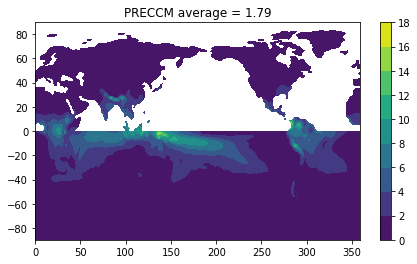

In [48]:
# create a mask for land in NH region for the global data
print "lat.shape", lat.shape
lons, lats = np.meshgrid(lon,lat)
print "lons", lons.shape
print "lats", lats.shape
print "LANDFRAC2", LANDFRAC2.shape
llist = (LANDFRAC2[:] < 0.5) & (lats[:] > 0. )
#print "llist",llist[0,0],llist[-1,-1] # print out a few values which should be near NP and SP
#print "land zero", llist.shape
PRECCM = PRECC # create a variable that is a copy of the NH precip
PRECCM.mask = llist # add a mask for land points
print "longname",PRECCM.long_name
plt.figure(figsize=(16, 4))
#fig, ax = plt.subplots()
plt.subplot(121)
print "range", PRECCM.min(), PRECCM.max()
PRECCM.info()
gavg = cdutil.averager(PRECCM,axis="xy",weights="weighted")
#titl = "{0:s} (model-obs) = {1:f}".format("V2NL",gavg)
titl = "%s = %.2f"%("PRECCM average", gavg)
print titl
plt.title(titl)
clevs =  np.arange(0.,20., 2).tolist()
print clevs
cs = plt.contourf(lon, lat, PRECCM, clevs)
# add colorbar.
cbar = plt.colorbar(cs)
plt.show()
#print "masked DV =", cdutil.averager(DVM,axis="xy",weights="weighted")



(192, 288)


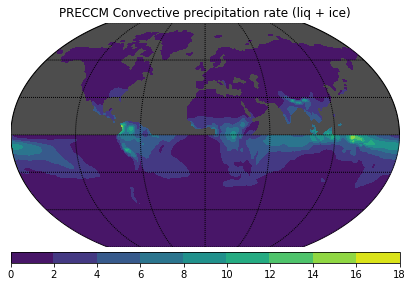

In [51]:
# example from http://matplotlib.org/basemap/users/examples.html

date = datetime(2007,12,15,0) # date to plot.
# open dataset.
#dataset = \
#Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
#timevar = dataset.variables['time']
#timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
#sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
#ice = dataset.variables['ice'][timeindex,:].squeeze()

lons, lats = np.meshgrid(lon2,lat2)
print lons.shape
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(projection='kav7',lon_0=0,resolution=None)
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
# im1 = m.pcolormesh(lons,lats,DVM,shading='flat',cmap=plt.cm.jet,latlon=True)
# cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# draw parallels and meridians, but don't bother labelling them.
# contour data over the map.
tlevs = clevs
cs = m.contourf(lons,lats,PRECCM,tlevs,latlon=True)
plt.title('contour lines over filled continent background')
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(cs,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('PRECCM %s'% PRECCM.long_name)
plt.show()


In [7]:
import cdms2
fname = "/Users/d3x345/NetCDF_Files/U_Ariz_SWE/UA_SWE_Averages_1_degree_1982_2014.nc"
g3 = cdms2.open(fname);
varlist = g3.listvariables();
dims = g3.listdimension();
print "dims", dims;
print "varlist", varlist;

mon =  g3('TMean')[:]
swe =  g3('SWE',squeeze=1)            # extract fields, remove dimensions length one
#print "swe", swe.info
#print swe.shape
swe = swe[0,:,:]
print "swe-rev", swe.info()
#print "swe-rev.shape", swe.shape
latx = g3['LAT']
print "len latx", len(latx), latx.shape
lonx = g3['LONG']
print "len lonx", len(lonx), lonx.shape
print "latx",  latx, latx.shape
grid = cdms2.createGenericGrid(latx, lonx, latBounds=None, lonBounds=None, order="yx", mask=None)
print "grid", grid.info
#avg = cdutil.averager(swe,axis="0",weights="unweighted")
#swed = swe.data
#swedb = swed.mean(axis=0)
#print "sweavg, cdutilavg", swedb.max(),avg.max()

#swe =  g2('elevation',squeeze=1)*conv            # extract fields, remove dimensions length one

print swe.info()



 dims ['months', 'south_north', 'west_east']
varlist ['TMean', 'SWE', 'LONG', 'Depth', 'PPT', 'LAT']
swe-rev*** Description of Slab SWE ***
id: SWE
shape: (26, 58)
filename: 
missing_value: 1e+20
comments: 
grid_name: N/A
grid_type: N/A
time_statistic: 
long_name: 
units: millimeters snow water equivalent
tileIndex: None
No grid present.
** Dimension 1 **
   id: south_north
   units:  
   Length: 26
   First:  0.0
   Last:   25.0
   Other axis attributes:
      realtopology: linear
   Python id:  0x117d46310
** Dimension 2 **
   id: west_east
   units:  
   Length: 58
   First:  0.0
   Last:   57.0
   Other axis attributes:
      realtopology: linear
   Python id:  0x117d46b50
*** End of description for SWE ***
 None
len latx 26 (26, 58)
len lonx 26 (26, 58)
latx <cdms2.fvariable.FileVariable object at 0x181c8b8790> (26, 58)
grid <bound method TransientRectGrid.info of Grid has Python id 0x117d465d0.
Gridtype: generic
Grid shape: (26, 26)
Order: yx
>
*** Description of Slab SWE ***
id: